# Import & Load Data

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud, STOPWORDS
from imblearn.over_sampling import RandomOverSampler
import nltk
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv('New President.csv')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1836988854143684894,Fri Sep 20 23:59:35 +0000 2024,0,@DedynurPalakka Rakyat berharap Presiden Baru ...,1837280476362592283,NaN,DedynurPalakka,in,NaN,0,0,0,https://x.com/HermanHabibi70/status/1837280476...,1537314103269548032,HermanHabibi70
1,1836914718516335098,Fri Sep 20 23:59:25 +0000 2024,1,@R4khm4t_M @mesheviksus2 @reltanahkusir @BudiB...,1837280436764258585,NaN,FelixSGL1,in,Jakarta,0,1,0,https://x.com/FelixSGL1/status/183728043676425...,2862109627,FelixSGL1
2,1836606684401406155,Fri Sep 20 23:58:55 +0000 2024,0,@BosPurwa @prabowo Bapak jendral prabowo sekar...,1837280309643190716,NaN,BosPurwa,in,NaN,0,0,0,https://x.com/AnwarOjat/status/183728030964319...,1630976361652424704,AnwarOjat
3,1837055126831518133,Fri Sep 20 23:58:53 +0000 2024,3,@NalarPolitik_ @rieke_diah Padahal kalau meman...,1837280299383935245,NaN,NalarPolitik_,in,Purwokerto,0,0,1,https://x.com/AzisAzissgrt/status/183728029938...,2500007743,AzisAzissgrt
4,1836918816015798337,Fri Sep 20 23:58:30 +0000 2024,0,@DokterTifa @prabowo Maaf dokter sebagai orang...,1837280203544089077,NaN,DokterTifa,in,NaN,0,0,0,https://x.com/xadar215727/status/1837280203544...,1804778658009370624,xadar215727


In [ ]:
df.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      312 non-null    int64 
 1   created_at               312 non-null    object
 2   favorite_count           312 non-null    int64 
 3   full_text                312 non-null    object
 4   id_str                   312 non-null    int64 
 5   image_url                37 non-null     object
 6   in_reply_to_screen_name  251 non-null    object
 7   lang                     312 non-null    object
 8   location                 140 non-null    object
 9   quote_count              312 non-null    int64 
 10  reply_count              312 non-null    int64 
 11  retweet_count            312 non-null    int64 
 12  tweet_url                312 non-null    object
 13  user_id_str              312 non-null    int64 
 14  username                 312 non-null    o

In [ ]:
df = df[['full_text']]
df

,full_text
0,@DedynurPalakka Rakyat berharap Presiden Baru ...
1,@R4khm4t_M @mesheviksus2 @reltanahkusir @BudiB...
2,@BosPurwa @prabowo Bapak jendral prabowo sekar...
3,@NalarPolitik_ @rieke_diah Padahal kalau meman...
4,@DokterTifa @prabowo Maaf dokter sebagai orang...
5,@konsuItan @jokowi @prabowo @BudiGSadikin @Kem...
6,@R4khm4t_M @mesheviksus2 @reltanahkusir @BudiB...
7,@Rudy5a3a1 @DedynurPalakka @psi_id @prabowo Pa...
8,@konsuItan @jokowi @prabowo @BudiGSadikin @Kem...
9,@mas_veel @prabowo @gibran_tweet Cerita ini di...


# Preprocessing

In [ ]:
df.shape #Mengecek ukuran dataframe sebelum proses pembersihan data.

(312, 1)

In [ ]:
df = df.drop_duplicates(subset=['full_text'])
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
full_text,0


In [ ]:
df.shape #Mengecek ukuran dataframe setelah pembersihan.

(311, 1)

In [ ]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Menghapus mentions
    text = re.sub(r'#\w+', '', text)  # Menghapus hashtags
    text = re.sub(r'RT[\s]+', '', text)  # Menghapus "RT" (retweet)
    text = re.sub(r'https?://\S+', '', text)  # Menghapus URL
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)  # Menghapus karakter non-alfanumerik
    text = re.sub(r'\s+', ' ', text).strip()  # Menghapus spasi ganda
    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)
df['full_text'] = df['full_text'].str.lower()

df

,full_text
0,rakyat berharap presiden baru berpihak pada ra...
1,mereka bingung milih siapa apalagi batak tuh m...
2,bapak jendral prabowo sekarang presiden terpil...
3,padahal kalau memang sedimen itu menimbulkan m...
4,maaf dokter sebagai orang biasa saya malah tak...
5,makin miris lihat negeri ini
6,fyi aja nih ya fyi aja korelasi sama twitt dia...
7,pas dan tepat
8,buktinya mana klo rakyat tuh punya wakil wong ...
9,cerita ini dipemerintahan siapasudah pasti buk...


In [ ]:
# Normalisasi

norm = {" yg ": " yang ","dg":"dengan","lg":"lagi","FYI":"for your information","Ane":"saya","nonis":"tidak islam","klo":"kalau", "cr":"cari","kl":"kalau", ' nggak ':' tidak ', ' gak ':' tidak ' ,' bangetdari ':' banget dari ','vibes ':' suasana ' ,'mantab ':' keren ',' benarsetuju ': ' benar setuju ',' ganjarmahfud ':' ganjar mahfud ', ' stylish ':' bergaya ',' ngapusi ':' bohong ',' gede ':' besar ', ' all in ':' yakin ', ' blokkkkk ':' goblok ', ' blokkkk ':' goblok ', ' blokkk ':' goblok ' ,' blokk ':' goblok ' , ' blok ':' goblok ',' ri ':' republik indonesia' ,' kem3nangan ':' kemenangan ', ' sat set ':' cepat ' ,' ala ':' dari ' ,' best ':' terbaik ' ,' mantab ':' mantap ' ,' bgttt ' : ' banget ' ," gue ": " saya ", " hrs ": " harus ", " fixed ":" tetap ", ' blom ':' belum ', ' aing ': ' aku ', ' tehnologi ':' teknologi ', ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika ', ' problem ':' masalah ', ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ', ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ', ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ', ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan ', ' bgt ':' banget ', ' yg ':' yang ', ' ga ': ' tidak ', ' text ':' teks ', ' end ':' selesai ', ' kelen ':' kalian ', ' jd ':' jadi ', ' tuk ':' untuk ', ' kk ':' kakak '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text
0,rakyat berharap presiden baru berpihak pada ra...
1,mereka bingung milih siapa apalagi batak tuh m...
2,bapak jendral prabowo sekarang presiden terpil...
3,padahal kalau memang sedimen itu menimbulkan m...
4,maaf dokter sebagai orang biasa saya malah tak...
5,makin miris lihat negeri ini
6,fyi aja nih ya fyi aja korelasi sama twitt dia...
7,pas dan tepat
8,buktinya mana kalau rakyat tuh punya wakil won...
9,cerita ini dipemerintahan siapasudah pasti buk...


In [ ]:
# 4. Stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
more_stop_words = ["tidak", "di", "yang", "dengan"]
stop_words.update(more_stop_words)

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['full_text'] = df['full_text'].apply(remove_stopwords)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,full_text
0,rakyat berharap presiden berpihak rakyat mulyo...
1,bingung milih batak tuh pilihannya prabowo koa...
2,jendral prabowo presiden terpilih inpres kepres
3,sedimen menimbulkan lintas laut sedimen dipind...
4,maaf dokter orang takut kejiwaan mohon diperik...
5,miris lihat negeri
6,fyi aja nih ya fyi aja korelasi twitt diatas a...
7,pas
8,buktinya rakyat tuh wakil aja
9,cerita dipemerintahan siapasudah pemerintahan ...


In [ ]:
!pip install Sastrawi

In [ ]:
# 5. Tokenizing

tokenized = df['full_text'].apply(lambda x:x.split())
tokenized


,full_text
0,"[rakyat, berharap, presiden, berpihak, rakyat,..."
1,"[bingung, milih, batak, tuh, pilihannya, prabo..."
2,"[jendral, prabowo, presiden, terpilih, inpres,..."
3,"[sedimen, menimbulkan, lintas, laut, sedimen, ..."
4,"[maaf, dokter, orang, takut, kejiwaan, mohon, ..."
5,"[miris, lihat, negeri]"
6,"[fyi, aja, nih, ya, fyi, aja, korelasi, twitt,..."
7,[pas]
8,"[buktinya, rakyat, tuh, wakil, aja]"
9,"[cerita, dipemerintahan, siapasudah, pemerinta..."


In [ ]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stemmed = tokenized.apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

stemmed

,full_text
level_0,
0,rakyat harap presiden pihak rakyat mulyono kro...
1,bingung milih batak tuh pilih prabowo koalisi ...
2,jendral prabowo presiden pilih inpres pres
3,sedimen timbul lintas laut sedimen pindah revi...
4,maaf dokter orang takut jiwa mohon periksa ya
5,miris lihat negeri
6,fyi aja nih ya fyi aja korelasi twitt atas ane...
7,pas
8,bukti rakyat tuh wakil aja


In [ ]:
# stemmed.to_csv("New President Preprocessing.csv", index=False)

# Translate

Tujuan:














In [ ]:
#  tranlate
!pip install deep-translator

In [ ]:
from deep_translator import GoogleTranslator

def translate_text(text):
    # Check if the text is valid before translating
    if isinstance(text, str) and text.strip() and not pd.isnull(text):
        return GoogleTranslator(source='auto', target='en').translate(text)
    else:
        return ""  # or any other value you want to use for missing values

df['full_text_english'] = df['full_text'].apply(translate_text)

In [ ]:
df.reset_index(drop=False, inplace=True)

In [ ]:
# df.to_csv("Translated New President.csv", index=False)

In [ ]:
df['full_text_english']

,full_text_english
0,The people hope that the president will side w...
1,"I'm confused about choosing batak, Prabowo is ..."
2,general prabowo president elect presidential i...
3,sediment causes sea crossing sediment is moved...
4,"Sorry doctor, I'm afraid the person is mentall..."
5,sad to see the country
6,"It's okay, it's okay, it's okay, it's just the..."
7,not
8,the proof is that the people are just represen...
9,story in whose government is Jokowi's government?


# Labeling

In [ ]:
# labeling
df = pd.read_csv("Translated New President.csv", index_col=0)
df

,full_text,full_text_english
index,,
0,rakyat harap presiden pihak rakyat mulyono kro...,people hope president people's party mulyono k...
1,bingung milih batak tuh pilih prabowo koalisi ...,"I'm confused about choosing Batak, so I chose ..."
2,jendral prabowo presiden pilih inpres pres,general prabowo president choose inpres pres
3,sedimen timbul lintas laut sedimen pindah revi...,sedimentary sedimentary sedimentary sedimentar...
4,maaf dokter orang takut jiwa mohon periksa ya,"Sorry doctor, people are afraid of their lives..."
5,miris lihat negeri,sad to see the country
6,fyi aja nih ya fyi aja korelasi twitt atas ane...,"fyi, it's just fyi, it's just the correlation ..."
7,pas,not
8,bukti rakyat tuh wakil aja,the people's evidence is just a representative


In [ ]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data_tweet = list(data['full_text_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
    # Check if the tweet is a string and not a float/NaN
    if isinstance(tweet, str):
        analysis = TextBlob(tweet)
        polaritas += analysis.polarity

        if analysis.sentiment.polarity > 0.0:
            total_positif += 1
            status.append('Positif')
        elif analysis.sentiment.polarity == 0.0:
            total_netral += 1
            status.append('Netral')
        else:
            total_negatif += 1
            status.append('Negatif')

        total += 1
    else:
        # Handle non-string values (e.g., skip or replace)
        print(f"Skipping non-string value at index {i}: {tweet}")

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Skipping non-string value at index 206: nan
Hasil Analisis Data:
Positif = 94
Netral = 140
Negatif = 76

Total Data : 310


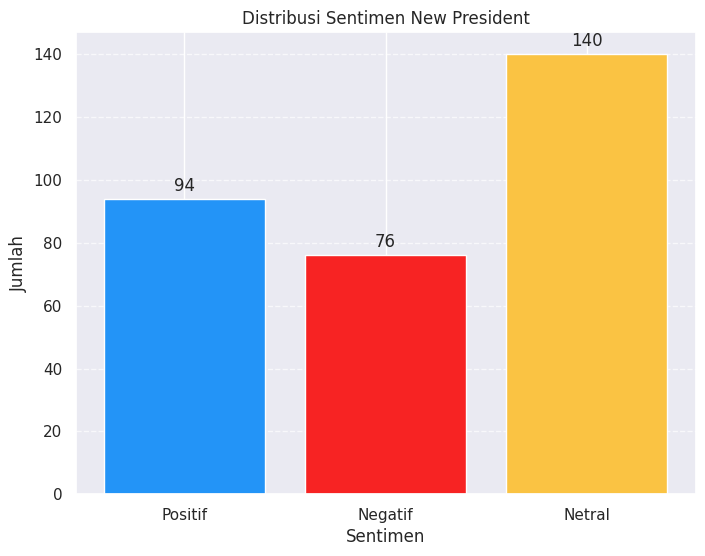

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen New President")

In [ ]:
df = pd.read_csv("Translated New President.csv", index_col=0)

# Ensure status list and DataFrame index have the same length before assigning
if len(status) != len(df.index):
    # Adjust status list length to match DataFrame index length, adding default 'Netral' if needed
    diff = len(df.index) - len(status)
    if diff > 0:
        print(f"Appending 'Netral' {diff} times to status to match DataFrame length.")
        status.extend(['Netral'] * diff)
    else: # In case the list is larger than the dataframe.
        print(f"Removing {abs(diff)} items from status to match dataframe length.")
        status = status[:len(df.index)]

# Assign the status list to the 'label' column
df['label'] = status
df


,full_text,full_text_english,label
index,,,
0,rakyat harap presiden pihak rakyat mulyono kro...,people hope president people's party mulyono k...,Positif
1,bingung milih batak tuh pilih prabowo koalisi ...,"I'm confused about choosing Batak, so I chose ...",Negatif
2,jendral prabowo presiden pilih inpres pres,general prabowo president choose inpres pres,Positif
3,sedimen timbul lintas laut sedimen pindah revi...,sedimentary sedimentary sedimentary sedimentar...,Positif
4,maaf dokter orang takut jiwa mohon periksa ya,"Sorry doctor, people are afraid of their lives...",Negatif
5,miris lihat negeri,sad to see the country,Negatif
6,fyi aja nih ya fyi aja korelasi twitt atas ane...,"fyi, it's just fyi, it's just the correlation ...",Positif
7,pas,not,Netral
8,bukti rakyat tuh wakil aja,the people's evidence is just a representative,Netral


In [ ]:
# df.to_csv('New President labels.csv', index=False)

In [ ]:
pd.set_option('display.max_rows', None)

# Menampilkan DataFrame lengkap
print(df[['full_text_english', 'label']])

                                       full_text_english    label
index                                                            
0      people hope president people's party mulyono k...  Positif
1      I'm confused about choosing Batak, so I chose ...  Negatif
2           general prabowo president choose inpres pres  Positif
3      sedimentary sedimentary sedimentary sedimentar...  Positif
4      Sorry doctor, people are afraid of their lives...  Negatif
5                                 sad to see the country  Negatif
6      fyi, it's just fyi, it's just the correlation ...  Positif
7                                                    not   Netral
8         the people's evidence is just a representative   Netral
9                Whose order story is it Jokowi's order?   Netral
10     Prabowo just being inaugurated like a presiden...   Netral
11     because it's hard to find a good job because i...  Positif
12                           Prabowo's nephew plays porn   Netral
13        

# TF_IDF

In [ ]:
# Before applying TF-IDF, handle NaN values in 'full_text_english'
df['full_text_english'] = df['full_text_english'].fillna('')  # Replace NaN with empty string

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['full_text_english']).toarray()
print( X.shape)


(311, 1498)


# Split Data

In [ ]:
# Splitting Data dengan Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)


In [ ]:
# Handling Imbalanced Data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
# Menampilkan jumlah data train dan test
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

total_data = len(X_train) + len(X_test)
print(f"Jumlah total data: {total_data}")

Jumlah data training: 217
Jumlah data testing: 94
Jumlah total data: 311


# Naive Bayes

In [ ]:
# Naive Bayes Model
model = MultinomialNB()
model.fit(X_resampled, y_resampled)

MultinomialNB()

# Evaluasi Model

In [ ]:
# Menggunakan model yang sudah dilatih untuk membuat prediksi pada data Uji
y_pred = model.predict(X_test)
# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")
# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Positif', 'Negatif', 'Netral']))

Akurasi Model: 46.81%

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Positif       0.35      0.59      0.44        22
     Negatif       0.52      0.34      0.41        38
      Netral       0.56      0.53      0.55        34

    accuracy                           0.47        94
   macro avg       0.48      0.49      0.47        94
weighted avg       0.50      0.47      0.47        94



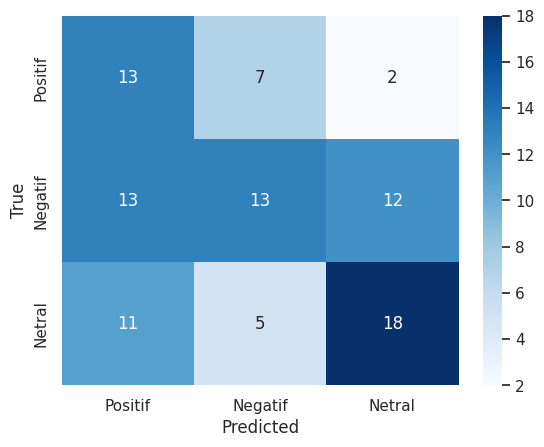

In [ ]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positif', 'Negatif', 'Netral'], yticklabels=['Positif', 'Negatif', 'Netral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Menggunakan model yang sudah dilatih untuk membuat prediksi pada data pelatihan
y_train_pred = model.predict(X_resampled)

# Menghitung akurasi
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print(f"Akurasi pada data pelatihan: {train_accuracy * 100:.2f}%")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi pada Data Pelatihan:")
print(classification_report(y_resampled, y_train_pred, target_names=['Positif', 'Negatif', 'Netral']))


Akurasi pada data pelatihan: 98.38%

Laporan Klasifikasi pada Data Pelatihan:
              precision    recall  f1-score   support

     Positif       0.96      0.99      0.98       103
     Negatif       0.99      0.97      0.98       103
      Netral       1.00      0.99      1.00       103

    accuracy                           0.98       309
   macro avg       0.98      0.98      0.98       309
weighted avg       0.98      0.98      0.98       309



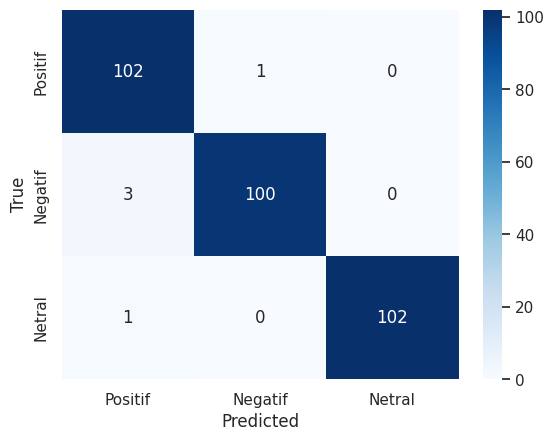

In [ ]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_resampled, y_train_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positif', 'Negatif', 'Netral'], yticklabels=['Positif', 'Negatif', 'Netral'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Word Cloud for Positive Sentiment:


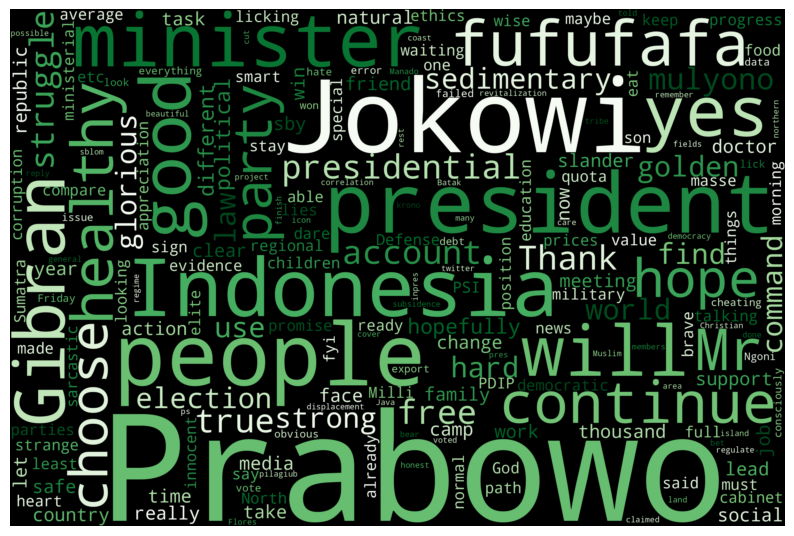

Word Cloud for Negative Sentiment:


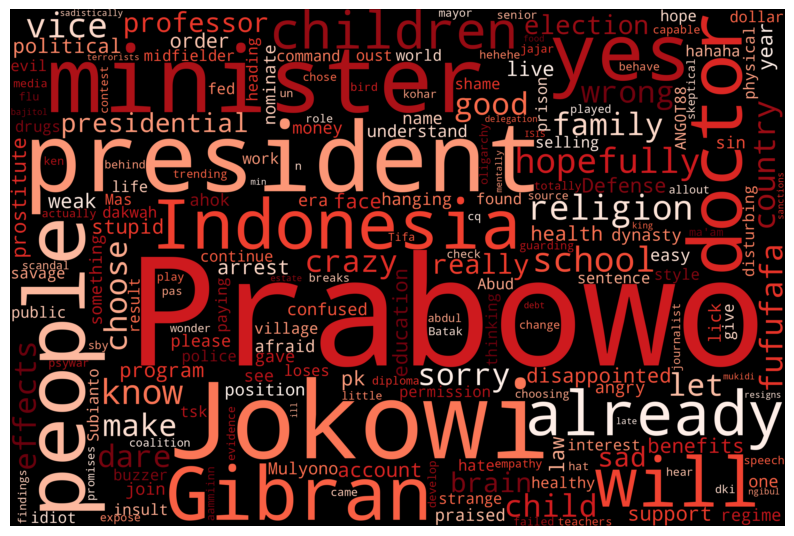

Word Cloud for Neutral Sentiment:


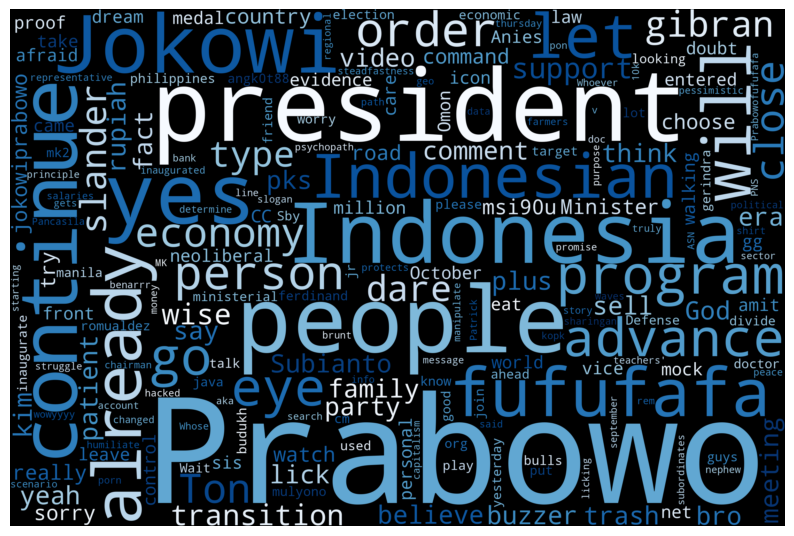

In [ ]:
# WordCloud Visualisasi
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

positive_words = ' '.join([text for text, sentiment in zip(df['full_text_english'], df['label']) if sentiment == 'Positif'])
negative_words = ' '.join([text for text, sentiment in zip(df['full_text_english'], df['label']) if sentiment == 'Negatif'])
neutral_words = ' '.join([text for text, sentiment in zip(df['full_text_english'], df['label']) if sentiment == 'Netral'])

wordcloud_positive = WordCloud(width=3000, height=2000, random_state=3, background_color='black', colormap='Greens_r', collocations=False, stopwords=STOPWORDS).generate(positive_words)
wordcloud_negative = WordCloud(width=3000, height=2000, random_state=3, background_color='black', colormap='Reds_r', collocations=False, stopwords=STOPWORDS).generate(negative_words)
wordcloud_neutral = WordCloud(width=3000, height=2000, random_state=3, background_color='black', colormap='Blues_r', collocations=False, stopwords=STOPWORDS).generate(neutral_words)

print("Word Cloud for Positive Sentiment:")
plot_cloud(wordcloud_positive)

print("Word Cloud for Negative Sentiment:")
plot_cloud(wordcloud_negative)

print("Word Cloud for Neutral Sentiment:")
plot_cloud(wordcloud_neutral)